In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

%config InlineBackend.figure_format = 'retina'


In [10]:
print("pandas version: " + pd.__version__)
print("numpy version: " + np.__version__)
print("seaborn version: " + sns.__version__)
print("matplotlib version: " + matplotlib.__version__)
print("skylearn version: " + sklearn.__version__)

pandas version: 0.23.4
numpy version: 1.15.4
seaborn version: 0.9.0
matplotlib version: 3.0.2
skylearn version: 0.20.1


### Udacity Project 4: Write a Data Science Blog Project Using CRISP-DM methodology to Analyze Seattle Airbnb Dataset.

##### CRISP-DM stands for cross-industry process for data mining. The CRISP-DM methodology provides a structured approach to planning a data mining project. It is a robust and well-proven methodology and the whole includes 6 steps;

* Business Understanding,
* Data Understanding,
* Data Preparation,
* Modeling,
* Evaluation,
* Deployment.

##### Business Questions:
1. What is the distribution of the listings price?
2. Which neighborhood has the most listings?
3. Can we predict the price of a new listing based on some of its attributes?

##### 1. Data understanding
First, let us have a look at the dataset. The Seattle Airbnb dataset includes 3 CSV files:
- **calendar.csv**: including listing id and the price and availability for that day;
- **listings.csv**: including full descriptions and average review score;
- **reviews.csv**: including unique id for each reviewer and detailed comments.

We mainly uses the data in the listings.csv file to perform analysis and answer the above questions.

In [11]:
listings_df = pd.read_csv("listings.csv")

In [12]:
listings_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [13]:
listings_df.shape

(3818, 92)

showing column names of the listing dataset.

In [14]:
listings_df.columns.values

array(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name',
       'summary', 'space', 'description', 'experiences_offered',
       'neighborhood_overview', 'notes', 'transit', 'thumbnail_url',
       'medium_url', 'picture_url', 'xl_picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode',
       'market', 'smart_location', 'country_code', 'country', 'latitude',
       'longitude', 'is_location_exact', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
       

## 2. Data Preparation
**2.1 Dealing with missing values**
It is important that we examine the null values of the dataset before other analysis.First, we compute the proprotion of missing values for each columns and sort them on missing value proportion by descending order. Then, we drop the columns with missing value proportion greater than 30%.

In [15]:
listings_df.isnull().mean().sort_values(ascending=False)

license                             1.000000
square_feet                         0.974594
monthly_price                       0.602672
security_deposit                    0.511262
weekly_price                        0.473808
notes                               0.420639
neighborhood_overview               0.270299
cleaning_fee                        0.269775
transit                             0.244631
host_about                          0.224987
host_acceptance_rate                0.202462
review_scores_accuracy              0.172342
review_scores_checkin               0.172342
review_scores_value                 0.171818
review_scores_location              0.171556
review_scores_cleanliness           0.171032
review_scores_communication         0.170508
review_scores_rating                0.169460
reviews_per_month                   0.164222
first_review                        0.164222
last_review                         0.164222
space                               0.149031
host_respo

In [16]:
listings_df = listings_df.dropna(thresh=listings_df.shape[0] * 0.7, axis=1)

**2.2 Dealing with currency values**

For columns contains currency values, we first removing the currency symbols - $ and , -, then convert the data type into float64, and finally, fill missing values with the column mean for each column.

In [17]:
listings_df[['price', 'cleaning_fee', 'extra_people']]

,price,cleaning_fee,extra_people
0,$85.00,NaN,$5.00
1,$150.00,$40.00,$0.00
2,$975.00,$300.00,$25.00
3,$100.00,NaN,$0.00
4,$450.00,$125.00,$15.00
5,$120.00,$40.00,$30.00
6,$80.00,NaN,$10.00
7,$60.00,$25.00,$0.00
8,$90.00,NaN,$0.00
9,$150.00,$40.00,$0.00


In [18]:
listings_df[['price', 'cleaning_fee', 'extra_people']].dtypes

price           object
cleaning_fee    object
extra_people    object
dtype: object

In [19]:
import re

def convertMoney2float64(df, col):
    '''
    INPUT:
    df - pandas dataframe with currency column you want to convert
    col - the currency column
    
    OUTPUT:
    
    '''
    # remove $ and , from the string
    currency_symbol = re.compile('[$,]')
    df[col] = df[col].apply(lambda x: currency_symbol.sub('', x) if pd.notna(x) else x)
    # convert data type to float64
    df[col] = df[col].astype('float64')

Change data type of price and cleaning_fee columns into float64.

In [20]:
convertMoney2float64(listings_df, 'price')
convertMoney2float64(listings_df, 'cleaning_fee')
convertMoney2float64(listings_df, 'extra_people')

Filling missing values of numerical columns with column mean value.

In [21]:
fill_mean = lambda col: col.fillna(col.mean())
num_col = list(listings_df.dtypes[listings_df.dtypes != 'object'].index)
listings_df[num_col] = listings_df[num_col].apply(fill_mean)

**2.3 Dealing with categorical columns**

In this section we create dummy columns for each categorical column. First, we list all columns of type 'object', and select 'room_type', 'bed_type', 'instant_bookable', and 'cancellation_policy' 4 columns as categorical columns. Then using function create_dummy_df to create dummy columns for each categorical column.

In [22]:
listings_df_obj = listings_df.select_dtypes(include='object')

In [23]:
listings_df_obj.columns.values

array(['listing_url', 'last_scraped', 'name', 'summary', 'space',
       'description', 'experiences_offered', 'neighborhood_overview',
       'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_verifications', 'host_has_profile_pic',
       'host_identity_verified', 'street', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city',
       'state', 'zipcode', 'market', 'smart_location', 'country_code',
       'country', 'is_location_exact', 'property_type', 'room_type',
       'bed_type', 'amenities', 'calendar_updated', 'has_availability',
       'calendar_last_scraped', 'first_review', 'last_review',
       'requires_license', 'jurisdiction_names', 'instant_bookable',
 

In [24]:
cat_cols = ['room_type', 'bed_type', 'instant_bookable', 'cancellation_policy']

In [25]:
def create_dummy_df(df, cat_cols, dummy_na):
    '''
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. removes all the original columns in cat_cols
            3. dummy columns for each of the categorical columns in cat_cols
            4. if dummy_na is True - it also contains dummy columns for the NaN values
            5. Use a prefix of the column name with an underscore (_) for separating 
    '''
    for col in  cat_cols:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df

In [26]:
listings_df.columns.values

array(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name',
       'summary', 'space', 'description', 'experiences_offered',
       'neighborhood_overview', 'transit', 'thumbnail_url', 'medium_url',
       'picture_url', 'xl_picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode',
       'market', 'smart_location', 'country_code', 'country', 'latitude',
       'longitude', 'is_location_exact', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
       'amenitie

In [27]:
listings_df_cat = create_dummy_df(listings_df, cat_cols, dummy_na=False)

In [28]:
listings_df_cat.columns.values

array(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name',
       'summary', 'space', 'description', 'experiences_offered',
       'neighborhood_overview', 'transit', 'thumbnail_url', 'medium_url',
       'picture_url', 'xl_picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode',
       'market', 'smart_location', 'country_code', 'country', 'latitude',
       'longitude', 'is_location_exact', 'property_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'amenities', 'price',
       'cleaning_fe

## 3. Data analysis

**3.1 What is the distribution of the listings price?**

The highest price is 1000 dolar, the lowest price is 20 dolar, and median is 100 dolar.

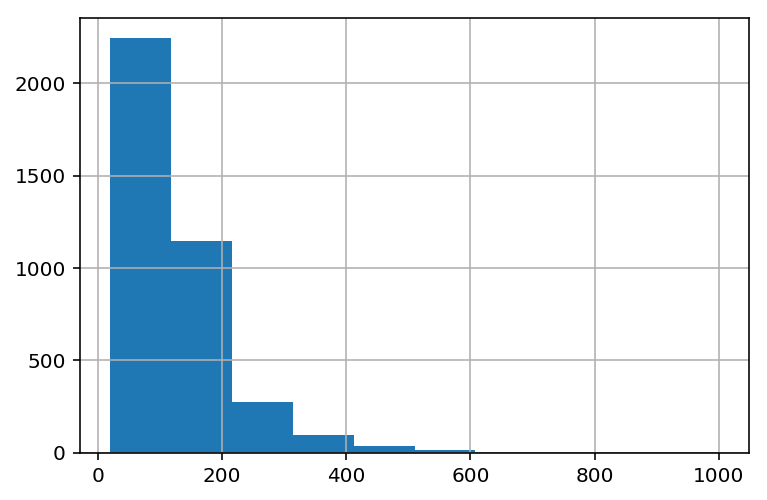

In [29]:
listings_df['price'].hist()

In [30]:
pd.DataFrame(listings_df.describe()['price'])

,price
count,3818.000000
mean,127.976166
std,90.250022
min,20.000000
25%,75.000000
50%,100.000000
75%,150.000000
max,1000.000000


**3.2 Which neighborhood has the most listings?**

For this problem, we focus on the 'neighourhood' column. First, we delete rows with missing neighbourhood values, then count the number of listings for each neighbourhood.

In [31]:
listings_df.isnull()['neighbourhood'].mean()

0.10895756940806706

In [32]:
listings_df = listings_df.dropna(subset=['neighbourhood'], axis=0)
neighbourhood_list_count = listings_df.groupby(['neighbourhood']).size().sort_values(ascending=False)
neighbourhood_list_count

neighbourhood
Capitol Hill                 351
Ballard                      213
Belltown                     204
Minor                        192
Queen Anne                   187
Fremont                      148
Wallingford                  143
University District          107
First Hill                   105
Stevens                       98
North Beacon Hill             95
Lower Queen Anne              83
Central Business District     81
Greenwood                     79
Columbia City                 61
Ravenna                       59
Phinney Ridge                 56
Magnolia                      55
Green Lake                    52
Atlantic                      50
North Admiral                 48
Mount Baker                   46
Leschi                        44
Eastlake                      41
Maple Leaf                    41
Madrona                       40
Pike Place Market             39
The Junction                  36
Seward Park                   32
Bryant                       

As we can see Capitol Hill possesses 351 listings, followed by Barllard and Belltown, which have 213 and 204 listing respectively.

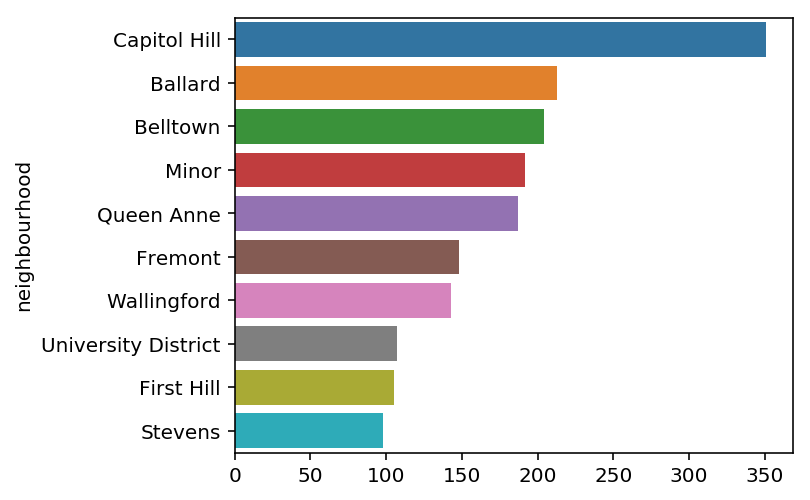

In [33]:
plt.rcParams['figure.figsize'] = (5.0, 4.0)
ax = sns.barplot(y=neighbourhood_list_count[:10].index, x=neighbourhood_list_count[:10].values)

**3.3 Can we predict the price of a new listing based on some of its attributes?**

For this problem we use linear regression model to predict the price of a new listing. First, we select all numerical columns that possibly related to the price column, then compute a correlate matrix to show how strong these columns correlate to each other.

In [34]:
listings_df_cat_num = listings_df_cat[['accommodates','bathrooms', 'bedrooms', 'beds', 'price', 
        'cleaning_fee', 'room_type_Private room', 'room_type_Shared room', 'bed_type_Couch','bed_type_Futon', 
        'bed_type_Pull-out Sofa','bed_type_Real Bed', 'instant_bookable_t', 'cancellation_policy_moderate', 
        'cancellation_policy_strict']]

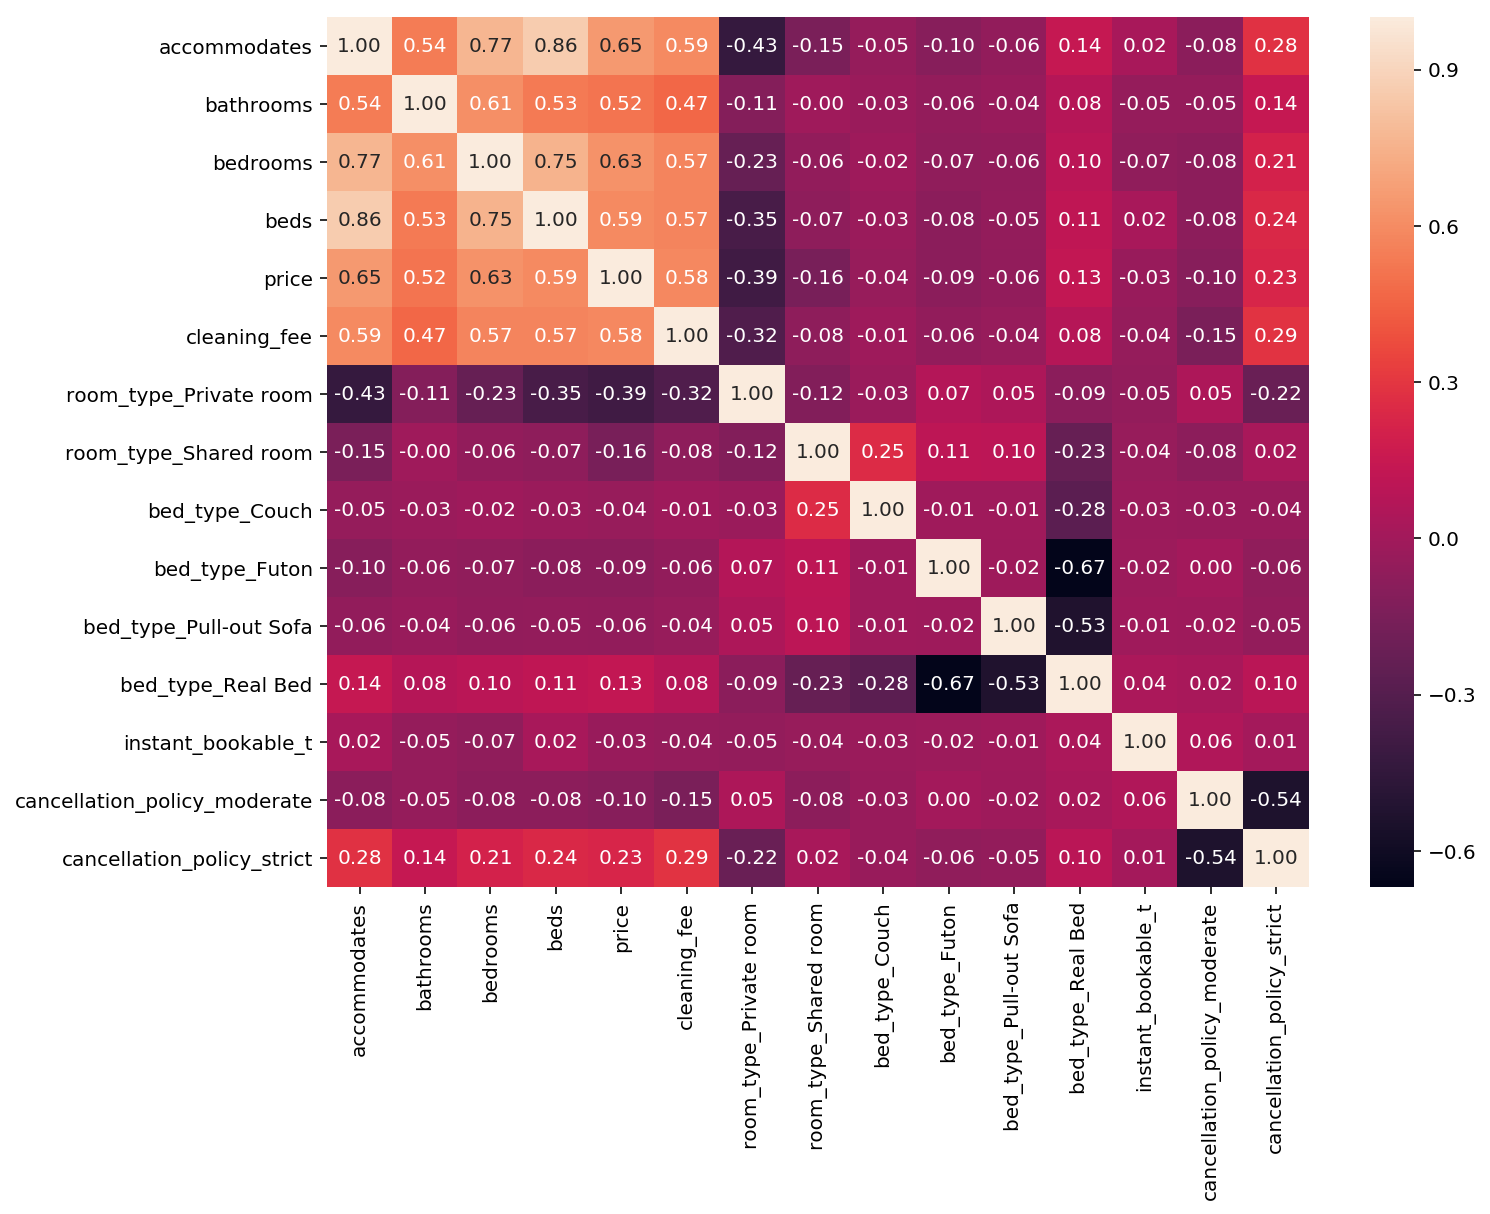

In [35]:
plt.rcParams['figure.figsize'] = (11.0, 8.0)
sns.heatmap(listings_df_cat_num.corr(), annot=True, fmt='.2f')

Using linear regression model to predict price of new listings, and computing the  𝑟2  score of the model on both the training and test dataset.

In [37]:
def fit_linear_mod(df, response_col, test_size=.3, rand_state=42):
    '''
    INPUT:
    df - pandas dataframe with explanatory and response variables
    response_col - the name of the response column
    test_size - the proportion of the dataset that are used for model testing
    rand_state - the random seed for traning set and test set spliting
    
    OUTPUT:
    test_score - the r2_score for test set
    train_score - the r2_score for trianing set
    lm_model - the linear regression model
    X_train - the explanatory of the training set
    X_test - the explantory of the test set
    y_train - the response of the training set
    y_test - the response of the test set
    y_test_preds - the predicted value of the test set
    '''
    #Split into explanatory and response variables
    X = df.drop(response_col, axis=1)
    y = df[response_col]

    #Split into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=rand_state)

    lm_model = LinearRegression(normalize=True) # Instantiate
    lm_model.fit(X_train, y_train) #Fit

    #Predict using your model
    y_test_preds = lm_model.predict(X_test)
    y_train_preds = lm_model.predict(X_train)

    #Score using your model
    test_score = r2_score(y_test, y_test_preds)
    train_score = r2_score(y_train, y_train_preds)

    return test_score, train_score, lm_model, X_train, X_test, y_train, y_test, y_test_preds


#Test your function with the above dataset
test_score, train_score, lm_model, X_train, X_test, y_train, y_test, y_test_preds = fit_linear_mod(listings_df_cat_num, 'price')

In [38]:
print("The rsquared on the training data was {}.  The rsquared on the test data was {}.".format(train_score, test_score))

The rsquared on the training data was 0.5492200731648258.  The rsquared on the test data was 0.5609727075654191.


The below digram shows how predict prices deviates from the true prices.

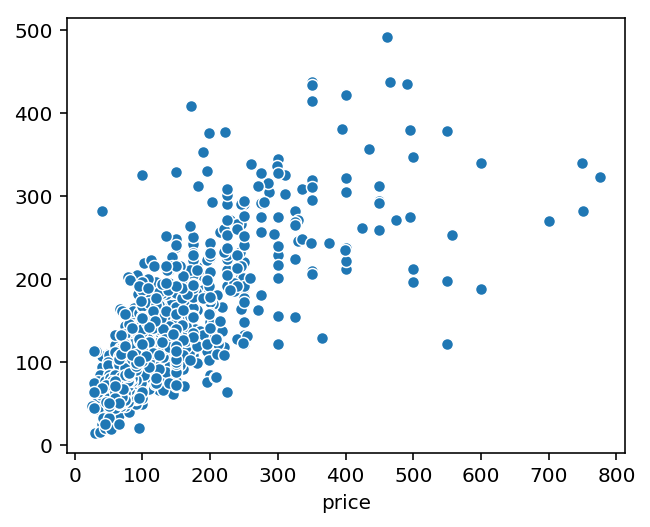

In [39]:
plt.rcParams['figure.figsize'] = (5.0, 4.0)
sns.scatterplot(x=y_test, y=y_test_preds)